### 표준화 변환

확률변수에 대한 선형 변환

$x_1, x_2, \dots, x_{n_1}$ : X 시험을 친 A그룹의 점수

$y_1, y_2, \dots, y_{n_2}$ : Y 시험을 친 B그룹의 점수

> 기존 $\bar{X}$로 표준화를 하면 저항성이 없어 이상치에 영향을 많이 받음. 따라서 중앙값으로 표준화를 시행.

* 로버스트 표준화 변환

$$\tilde{Z_i} = \frac{x_i - med_x}{\tilde{\sigma_x}}, ~ \tilde{\sigma_x} = IQR/1.35$$

> 중위수와 의사 표준편차 사용

In [ ]:
X <- rnorm(100, 40, 10)
Y <- c(rnorm(90, 40, 10), rnorm(10, 80, 5))

Z_x <- (x - mean(x))/sd(x)
Z_y <- (y - mean(y))/sd(y)

ZZ_x <- (x - median(x))/(IQR(x)/1.35)
ZZ_y <- (y - median(y))/(IQR(y)/1.35)

par(mfrow = c(2,2))

* 분포를 대칭화 할 때 변환

> $x$ : 원자료, $x^p$ : 변환된 자료

$$f(x) = x^p$$

$x = M$(중위수)에 대한 테일러급수 전개

$$f(x) \approx f(M) + f'(M)(x - M) + \frac{f''(M)(x - M)^2}{2!}$$

$${H_L}^p \approx M^p + pM^{p-1}(H_L - M) + \frac{p(p-1)M^{p-2}(H_L - M)}{2!}$$

$${H_U}^p \approx M^p + pM^{p-1}(H_U - M) + \frac{p(p-1)M^{p-2}(H_U - M)}{2!}$$

> 변환한 힌지의 값을 이렇게 쓴다.

* 대칭이 되려면 $M^p - {H_L}^P = {H_U}^p - M^p$여야 한다. 즉, 해당 식을 p에 관해 정리하여 p의 값을 근사할 수 있다.

$$p \approx 1 - \frac{\frac{H_L + H_U}{2}-M}{\frac{(H_L-M)^2 + (H_U-M)^2}{4M}}$$

Box-Cox 변환 재표현 사다리

p = 1 : 무변환

p = ±1/3 안쪽에서는 0에 가깝다고 보고 그냥 로그변환을 한다.

* 몇 개 집단의 산포를 균일화시키고자 할 때

$${H_U}^2 - {H_L}^p \approx pM^{p-1}(H_U - H_L) = pM^{p-1}spr(H)$$

$$log({H_U}^2 - {H_L}^p) \approx log(p) + (p-1)$$

$x^p$변환에 의하여 (모든 집단의)산포가 균일해진다면, 좌변은 (확률변수가 아니라)상수가 되어야 한다.

$$log(spr(H)) \approx (1-p)log(M) + log(상수) - log(p)$$

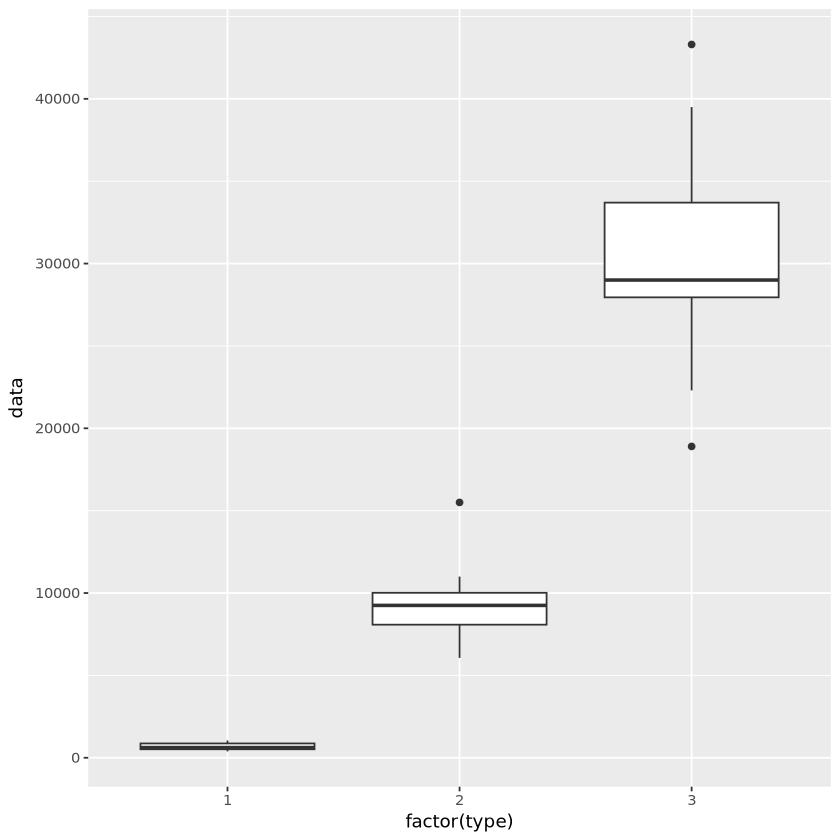

In [14]:
library(ggplot2)

type<-rep(1:3,c(11,11,11))
data<-c(387, 470,497,537,540,620,760,845,895,1020,1050, 6060,7600,7900,8260,8900,9250,9650,9830,10200,11000,15500, 18900,22300,27800,28100,28800,29000,31400,32800,34600,39500,43300)

plank <- data.frame(type, data)

ggplot(plank, aes(factor(type), data)) +
    geom_boxplot()

In [20]:
A1 <- plank[plank$type == 1,2]
A2 <- plank[plank$type == 2,2]
A3 <- plank[plank$type == 3,2]

In [22]:
fivenum(A1)  ## 다섯 수치 요약

[1]  387  517  620  870 1050

In [24]:
num1 <- fivenum(A1);  num2 <- fivenum(A2); num3 <- fivenum(A3)

data <- data.frame(num1, num2, num3)
data

num1,num2,num3
<dbl>,<dbl>,<dbl>
387,6060,18900
517,8080,27950
620,9250,29000
870,10015,33700
1050,15500,43300


In [32]:
m1 <- data[3,1]; m2 <- data[3,2]; m3 <- data[3,3]

med.trans <- c(log10(m1), log10(m2), log10(m3))
med_trans <- c(log(m1), log(m2), log(m3))
spr1 <- data[4,1] - data[2,1]; spr2 <- data[4,2] - data[2,2]; spr3 <- data[4,3] - data[2,3]

In [42]:
spr.trans <- c(log10(spr1), log10(spr2), log10(spr3))
spr_trans <- log(c(spr1, spr2, spr3))

In [43]:
out <- lm(spr.trans~med.trans)
out


Call:
lm(formula = spr.trans ~ med.trans)

Coefficients:
(Intercept)    med.trans  
     0.5486       0.7084  
